In [1]:
#download data from kaggle
!pip install opendatasets

In [2]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [12]:
od.download("https://www.kaggle.com/datasets/apoorvaappz/global-super-store-dataset", parse_dates=['Order Date', 'Ship Date'])


Skipping, found downloaded files in "./global-super-store-dataset" (use force=True to force download)


In [4]:
df = pd.read_csv("/content/superstore-dataset-final/Sample - Superstore.csv", encoding='latin1')

In [5]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


In [14]:
# extract dates
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['MonthName'] = df['Order Date'].dt.strftime('%b')
df['YearMonth'] = df['Order Date'].dt.to_period('M')

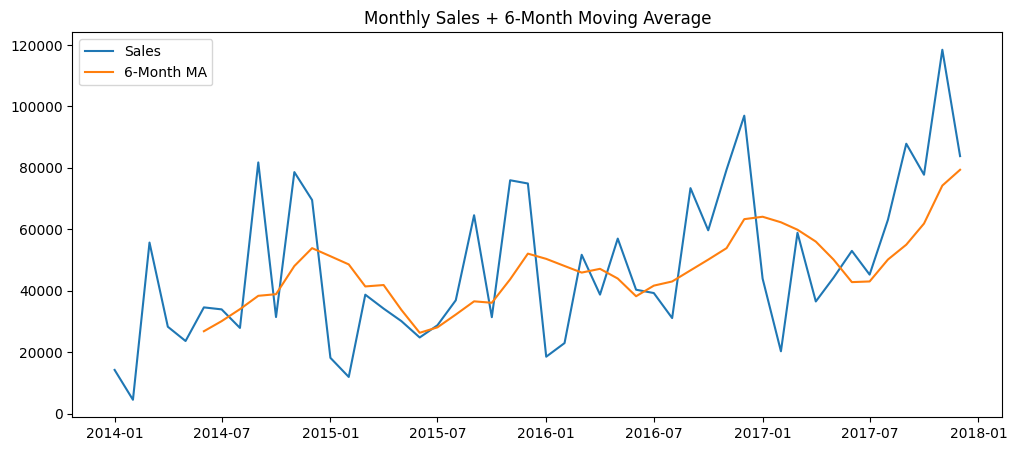

In [16]:
# Monthly Sales & Profit Trend
ts = df.groupby('YearMonth').agg({'Sales':'sum', 'Profit':'sum'}).reset_index()
ts['Sales_MA6'] = ts['Sales'].rolling(6).mean()
ts['Profit_MA6'] = ts['Profit'].rolling(6).mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(ts['YearMonth'].dt.to_timestamp(), ts['Sales'], label='Sales')
plt.plot(ts['YearMonth'].dt.to_timestamp(), ts['Sales_MA6'], label='6‑Month MA')
plt.title("Monthly Sales + 6‑Month Moving Average")
plt.legend()
#plt.savefig("monthly_sales_ma.png")
plt.show()


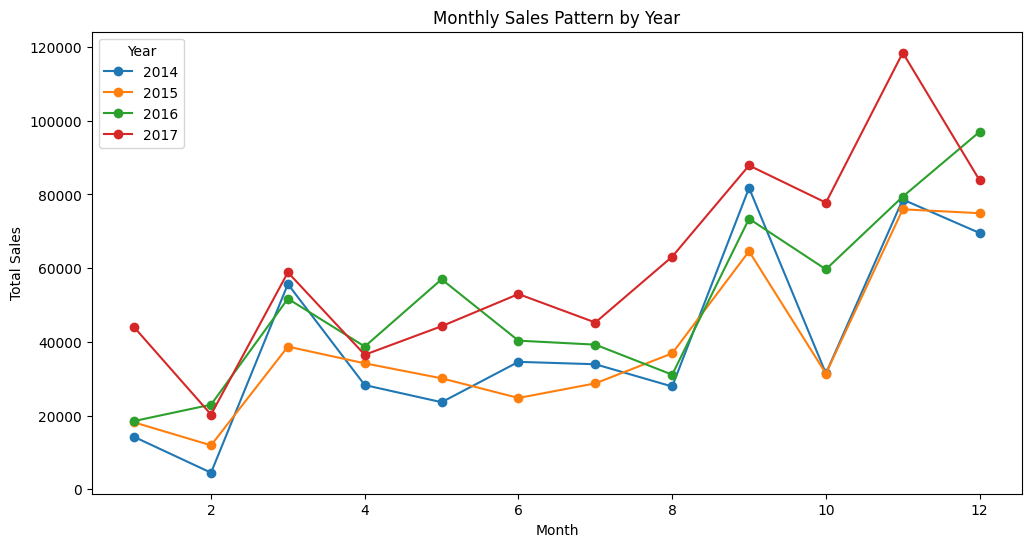

In [19]:
# Yearly Comparison / Seasonality Check
pivot = df.pivot_table(index='Month', columns='Year', values='Sales', aggfunc='sum')
pivot.plot(figsize=(12,6), marker='o')
plt.title("Monthly Sales Pattern by Year")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.legend(title='Year')
#plt.savefig("Monthly Sales Pattern by Year.png")
plt.show()
